## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


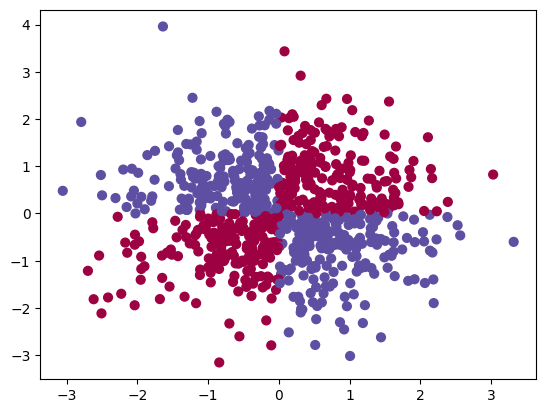

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.7059
Epoch 200, Loss: 1.0615
Epoch 300, Loss: 1.6282
Epoch 400, Loss: 2.1139
Epoch 500, Loss: 2.5235
Epoch 600, Loss: 2.8725
Epoch 700, Loss: 3.1737
Epoch 800, Loss: 3.4369
Epoch 900, Loss: 3.6694
Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       387
           1       1.00      0.99      0.99       413

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



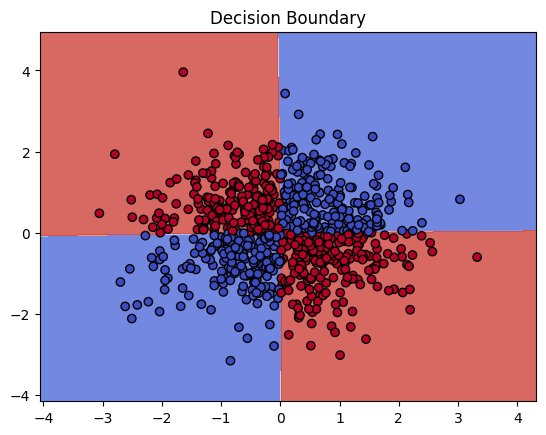

In [ ]:
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Activation Functions
def relu(z):
    """
    Applies the ReLU (Rectified Linear Unit) activation function.

    Parameters:
        z (numpy.ndarray): Input array.

    Returns:
        numpy.ndarray: Output array with ReLU applied element-wise.
    """
    return np.maximum(0, z)

def relu_derivative(z):
    """
    Computes the derivative of the ReLU activation function.

    Parameters:
        z (numpy.ndarray): Input array.

    Returns:
        numpy.ndarray: Derivative of the ReLU function with respect to z.
    """
    return (z > 0).astype(float)

def sigmoid(z):
    """
    Applies the sigmoid activation function.

    Parameters:
        z (numpy.ndarray): Input array.

    Returns:
        numpy.ndarray: Output array with sigmoid applied element-wise.
    """
    return 1 / (1 + np.exp(-z))

# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss.

    Parameters:
        y_true (numpy.ndarray): True labels.
        y_pred (numpy.ndarray): Predicted probabilities.

    Returns:
        float: Cross-entropy loss.
    """
    epsilon = 1e-8  # To prevent log(0)
    loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    return loss

# Forward Pass
def forward_pass(X, W1, b1, W2, b2):
    """
    Performs a forward pass through the neural network.

    Parameters:
        X (numpy.ndarray): Input data.
        W1 (numpy.ndarray): Weights for the hidden layer.
        b1 (numpy.ndarray): Biases for the hidden layer.
        W2 (numpy.ndarray): Weights for the output layer.
        b2 (numpy.ndarray): Biases for the output layer.

    Returns:
        tuple: Predicted probabilities and a cache of intermediate values.
    """
    # Input to hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    # Hidden layer to output
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    # Save intermediate results for backprop
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# Backward Pass
def backward_pass(X, y, W1, W2, cache):
    """
    Performs a backward pass through the neural network.

    Parameters:
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): True binary labels (0 or 1).
        W1 (numpy.ndarray): Weights for the hidden layer.
        W2 (numpy.ndarray): Weights for the output layer.
        cache (dict): Cached values from the forward pass.

    Returns:
        dict: Gradients of weights and biases.
    """
    m = X.shape[0]
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]

    # Output layer gradients
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer gradients
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

# Training Function
def train(X, y, hidden_size, learning_rate, epochs, batch_size):
    """
    Trains a neural network using stochastic gradient descent.

    Parameters:
        X (numpy.ndarray): Training data.
        y (numpy.ndarray): Training labels (binary: 0 or 1).
        hidden_size (int): Number of units in the hidden layer.
        learning_rate (float): Learning rate for weight updates.
        epochs (int): Number of training epochs.
        batch_size (int): Size of each training batch.

    Returns:
        tuple: Trained weights, biases, and loss history.
    """
    # Initialize weights and biases
    input_size = X.shape[1]
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1) * 0.1
    b2 = np.zeros((1, 1))

    losses = []

    # Training loop
    for epoch in range(epochs):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            # Forward and backward pass
            y_pred, cache = forward_pass(X_batch, W1, b1, W2, b2)
            gradients = backward_pass(X_batch, y_batch, W1, W2, cache)

            # Update weights and biases
            W1 -= learning_rate * gradients["dW1"]
            b1 -= learning_rate * gradients["db1"]
            W2 -= learning_rate * gradients["dW2"]
            b2 -= learning_rate * gradients["db2"]

        # Calculate loss
        y_pred_full, _ = forward_pass(X, W1, b1, W2, b2)
        loss = cross_entropy_loss(y, y_pred_full)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, losses

# Prediction Function
def predict(X, W1, b1, W2, b2):
    """
    Makes predictions using the trained neural network.

    Parameters:
        X (numpy.ndarray): Input data.
        W1 (numpy.ndarray): Weights for the hidden layer.
        b1 (numpy.ndarray): Biases for the hidden layer.
        W2 (numpy.ndarray): Weights for the output layer.
        b2 (numpy.ndarray): Biases for the output layer.

    Returns:
        numpy.ndarray: Predicted binary labels (0 or 1).
    """
    y_pred, _ = forward_pass(X, W1, b1, W2, b2)
    return (y_pred > 0.5).astype(int)

# Train the model
hidden_size = 8
learning_rate = 0.01
epochs = 1000
batch_size = 32

W1, b1, W2, b2, losses = train(X_train, y_train, hidden_size, learning_rate, epochs, batch_size)

# Evaluate model
y_train_pred = predict(X_train, W1, b1, W2, b2)
y_test_pred = predict(X_test, W1, b1, W2, b2)

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot decision boundary
def predict_func(X):
    return predict(X, W1, b1, W2, b2)

# Custom function to plot decision boundary
def plot_decision_boundary(predict_func, X, y):
    """
    Plots the decision boundary of a classifier.

    Parameters:
        predict_func (callable): Function to predict labels.
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): True labels.

    Returns:
        None
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for each point in the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_func(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(lambda X: predict(X, W1, b1, W2, b2), X_train, y_train)

